Instruções
- Resolver as questões abaixo. Subir o notebook em um repositório público no GitHub e enviar no [Formulário](https://docs.google.com/forms/d/e/1FAIpQLSf8IUCLt4kowhHhB3SRQofE2I8NuXuDadBYjRHqUxgb3yWOaQ/viewform)
- Para resolver as questões abaixo utilizar o dataset do seaborn: 'mpg'
- Para os gráficos finais de cada questão, eles devem possuir título, rótulo dos eixos definidos e legenda (quando necessário).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importa dataset

mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [4]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


#### Questão 1

Verificar se a base de dados possui valores nulos. Para as linhas com valores nulos, deletar as mesmas. Ao final da questão verificar se a base de dados ficou com 392 registros e 9 colunas.

In [5]:
mpg.shape

(398, 9)

In [6]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [7]:
mpg.dropna(inplace=True)
mpg.shape

(392, 9)

#### Questão 2

Qual a quantidade de carros por origem (*origin*)? Responda utilizando um gráfico de barras e inclua os rótulos dos dados.

passos para plotagem:
1. entender nosso dataset
2. entender nossa questão de negocio
3. realizar as transformações necessárias
4. realizar a plotagem

In [8]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [9]:
mpg['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

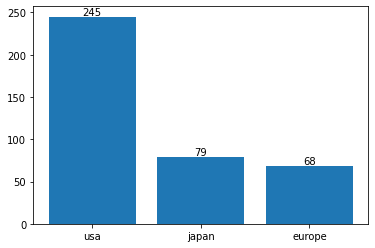

In [10]:
# fig = plt.figure(params)
fig, ax = plt.subplots()
# fig, ax = plt.subplots(2, 2)

x = mpg['origin'].value_counts().index
y = mpg['origin'].value_counts().values

bars = ax.bar(x, y)
ax.bar_label(bars)
plt.show()

#### Questão 3
Qual a média da potência (*horsepower*) dos carros por origem?

In [11]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [12]:
mpg.groupby('origin')['horsepower'].mean().reset_index()

,origin,horsepower
0,europe,80.558824
1,japan,79.835443
2,usa,119.048980


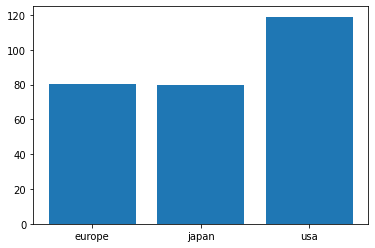

In [13]:
x = mpg.groupby('origin')['horsepower'].mean().reset_index()['origin']
y = mpg.groupby('origin')['horsepower'].mean().reset_index()['horsepower']

plt.bar(x, y)
plt.show()

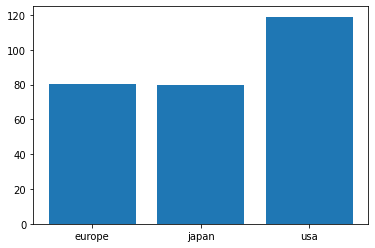

In [14]:
df_horsepower = mpg.groupby('origin')['horsepower'].mean().reset_index()

plt.bar(data=df_horsepower, x='origin', height='horsepower')
plt.show()

#### Questão 4

Qual a correlação da potência (*horsepower*) com a aceleração (*acceleration*) com carros?

In [15]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


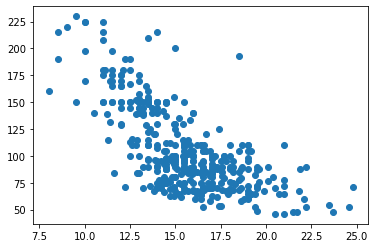

In [16]:
plt.scatter(data=mpg, x='acceleration', y='horsepower')
plt.show()

#### Questão 5
Qual a correlacão da potência (*horsepower*) com a aceleração (*acceleration*) dos carros, segmentando de acordo com a origem (*origin*) com cores diferentes e plotando no mesmo eixo (*axes*)?

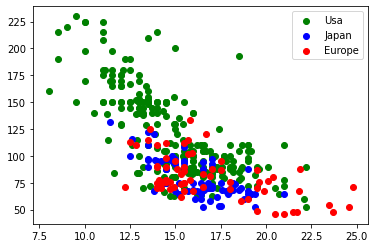

In [19]:
plt.scatter(data=mpg[mpg['origin']=='usa'], 
            x='acceleration', y='horsepower', c='green', label='Usa')
plt.scatter(data=mpg[mpg['origin']=='japan'], 
            x='acceleration', y='horsepower', c='blue', label='Japan')
plt.scatter(data=mpg[mpg['origin']=='europe'], 
            x='acceleration', y='horsepower', c='red', label='Europe')

plt.legend()
plt.show()

## Duvidas

Como criar um gráfico com múltiplos eixos y, compartilhando o eixo x?

exemplo matplotlib: https://matplotlib.org/3.4.3/gallery/ticks_and_spines/multiple_yaxis_with_spines.html

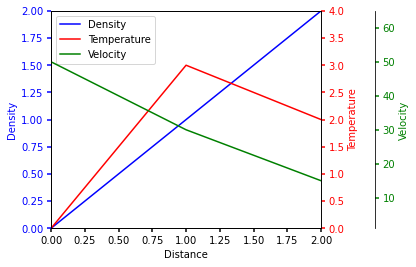

In [20]:
fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin2.spines.right.set_position(("axes", 1.2))

p1, = ax.plot([0, 1, 2], [0, 1, 2], "b-", label="Density")
p2, = twin1.plot([0, 1, 2], [0, 3, 2], "r-", label="Temperature")
p3, = twin2.plot([0, 1, 2], [50, 30, 15], "g-", label="Velocity")

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
twin1.set_ylim(0, 4)
twin2.set_ylim(1, 65)

ax.set_xlabel("Distance")
ax.set_ylabel("Density")
twin1.set_ylabel("Temperature")
twin2.set_ylabel("Velocity")

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

ax.legend(handles=[p1, p2, p3])

plt.show()